A continuación se entrena un modelo de redes neuronales cuyo objetivo es clasificar los dígitos del 0 al 9.

Para empezar, se importan las librerías y funciones necesarias para entrenar el modelo y también para posteriormente generar gráficas sobre el comportamiento y resultados del modelo. Se importa numpy, matplotlib.pyplot, tensorflow, cv2 y keras.

In [ ]:
# basic imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from google.colab import files
from tensorflow import keras
from tensorflow.keras.utils import load_img, img_to_array

Después se importa la base de datos MNIST de la librería tensorflow-keras para entrenar y validar el modelo. Y utilizando esta base de datos se generan sets de entrenamiento y prueba con 60000 imagenes de entrenamiento y 10000 de prueba.

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Tamaño de x_train:", x_train.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de x_test:", x_test.shape)
print("Tamaño de y_test:", y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Tamaño de x_train: (60000, 28, 28)
Tamaño de y_train: (60000,)
Tamaño de x_test: (10000, 28, 28)
Tamaño de y_test: (10000,)


A continuación se imprime un breve resumen de como se ven las primeras 10 imágenes del dataset junto con sus labels asignadas.

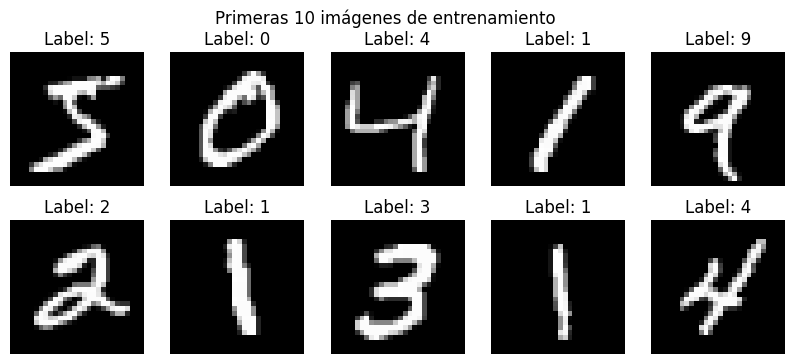

In [ ]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Primeras 10 imágenes de entrenamiento")
plt.show()

El siguiente paso es preparar el modelo previo al entrenamiento utilizando tensorflow-keras y configurando capa por capa el modelo incluyendo un input_shape=(28,28) para las imágenes con Flatten, ya que la resolución es de 28x28 pixeles y agregando capas con Dense. Además se utiliza el optimizer de Adam con un learning rate de 0.001 y se compila el modelo utilizando accuracy como métrica.

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

El siguiente paso es entrenar el modelo asignando un early stop el cual mide el accuracy de validación y con una paciencia de 10, detiene el entrenamiento si no se encuentra mejora por 10 épocas seguidas.
Una vez hecho esto se configura el modelo con 50 épocas y un validation split de 0.4 y batch size de 32 y se empieza a entrenar.

In [ ]:
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
patience=10, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=50,
validation_split=0.4, batch_size=32,
callbacks=[early_stop])

Epoch 1/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8106 - loss: 5.8316 - val_accuracy: 0.9047 - val_loss: 0.5157
Epoch 2/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9263 - loss: 0.3452 - val_accuracy: 0.9324 - val_loss: 0.3148
Epoch 3/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9469 - loss: 0.2058 - val_accuracy: 0.9321 - val_loss: 0.2772
Epoch 4/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9559 - loss: 0.1646 - val_accuracy: 0.9406 - val_loss: 0.2689
Epoch 5/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9594 - loss: 0.1485 - val_accuracy: 0.9532 - val_loss: 0.2044
Epoch 6/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9654 - loss: 0.1248 - val_accuracy: 0.9495 - val_loss: 0.2178
Epoch 7/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9686 - loss: 0.1097 - val_accuracy: 0.9506 - val_loss: 0.2146
Epoch 8/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9713 - loss: 0.1043 

El siguiente paso es guardar el modelo para no tener que entrenarlo cada vez que se desee usar e incluso poder llevarlo a otros ambientes de trabajo o máquinas.

In [ ]:
model.save("my_model.h5")

Para visualizar el comportamiento del modelo en el entrenamiento se generan plots con matplotlib en la que se muestra como fue variando la precisión a lo largo de las épocas al igual que la época en la cual se detiene el entrenamiento gracias al early stop.

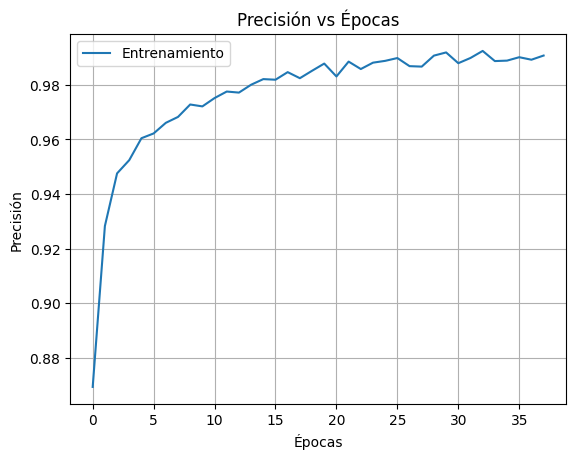

In [ ]:
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.title('Precisión vs Épocas')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

También se genera una gráfica para visualizar la pérdida del sistema a lo largo de las épocas durante el entrenamiento. La pérdide mide que tan "mal" predice el modelo.

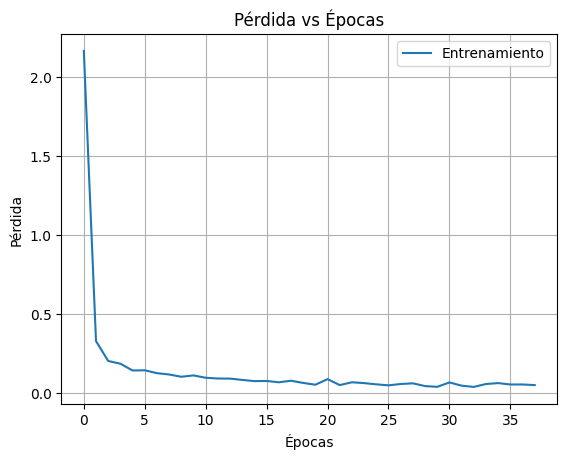

In [ ]:
plt.plot(history.history['loss'], label='Entrenamiento')
plt.title('Pérdida vs Épocas')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

Para comparar entrenamiento y validación, a continuación se imprime el promedio de exactitud en ambas etapas para el modelo.

In [ ]:
print(f"La exactitud del modelo en el entrenamiento fue de {np.mean(history.history['accuracy'])}")
print(f"La exactitud del modelo en la validación fue de {np.mean(history.history['val_accuracy'])}")

La exactitud del modelo en el entrenamiento fue de 0.9766250001756769
La exactitud del modelo en la validación fue de 0.9575153510821494


Los resultados y métricas hasta el momento son todas utilizando el dataset de entrenamiento, por lo que se procede a evaluar el modelo con el dataset de prueba y comparar los resultados.

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

print(f'Pérdida (loss) en prueba: {loss:.4f}')
print(f'Exactitud (accuracy) en prueba: {accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9644 - loss: 0.2961
Pérdida (loss) en prueba: 0.2443
Exactitud (accuracy) en prueba: 0.9705


Se observa una exactitud de prueba de 0.9705 la cual es mayor al promedio de exactitud de validación. Esto se puede deber principalmente a la naturaleza estocastica del sistema la cual permite que, por ejemplo, en alguna de las épocas la exactitud de validación fuera de 0.97 a pesar de que el promedio es de 0.96. Con otra configuración aleatoria, los resultados pueden variar un poco, pero en general, se mantienen similares.

Para el siguiente paso se prepararon 50 imagenes distintas, 5 para cada uno de los dígitos del 0 al 9 y se subieron al ambiente de trabajo. A continuación, se preprocesa cada una de las imagenes convirtiendolas a escala de grises, binarizandolas, invirtiendo los colores y reescalandolas a 28x28, para después agregarse a un array todas juntas para su uso a continuación.

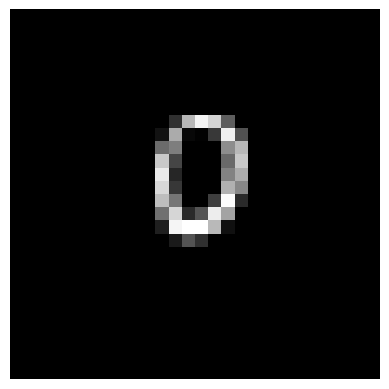

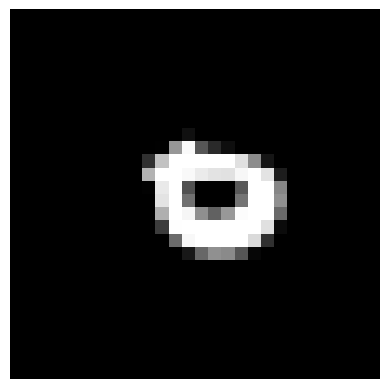

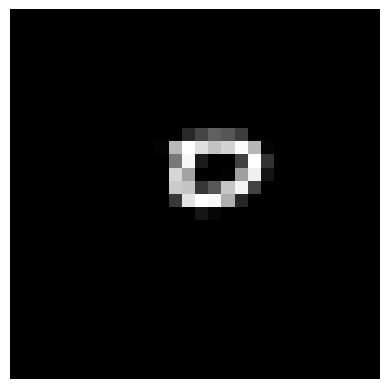

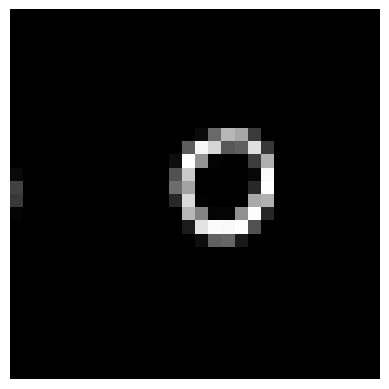

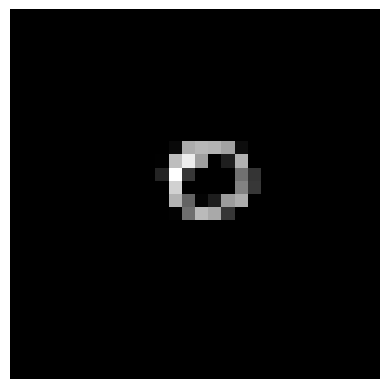

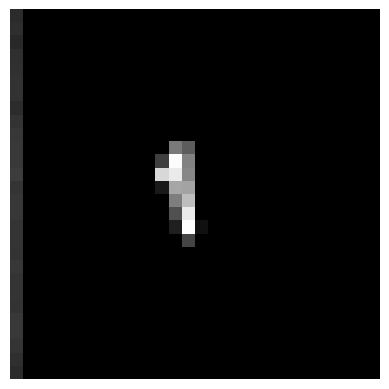

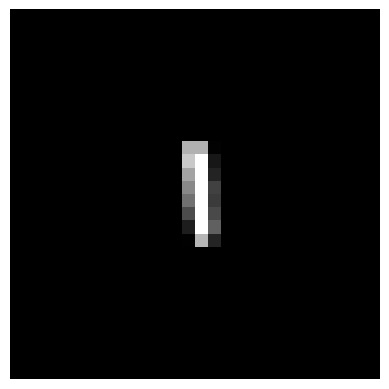

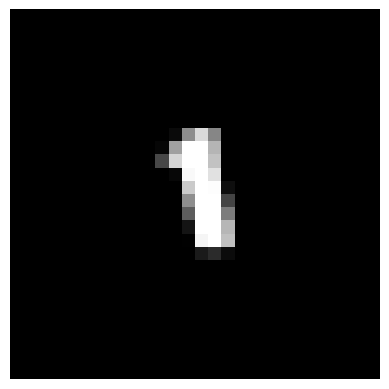

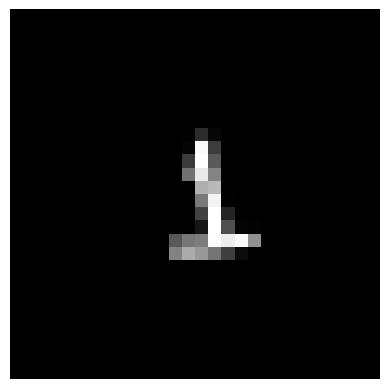

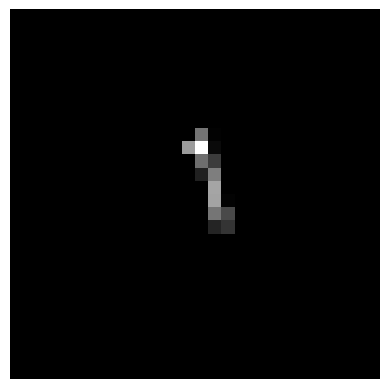

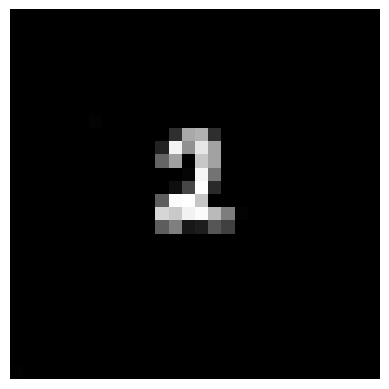

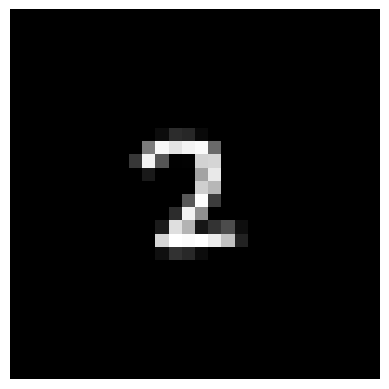

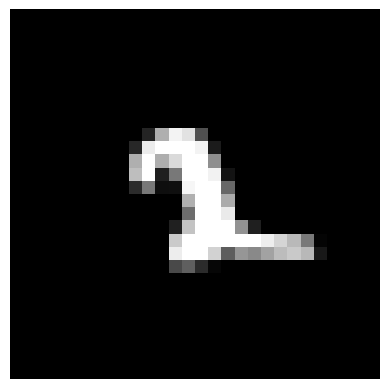

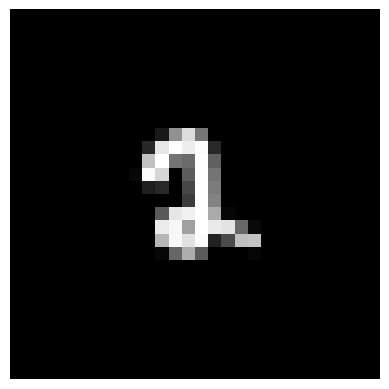

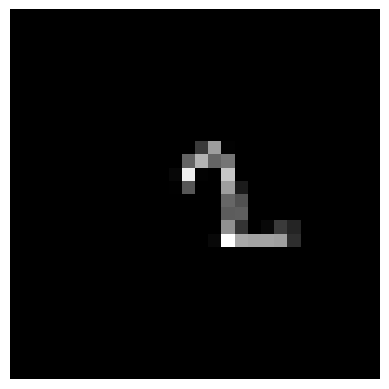

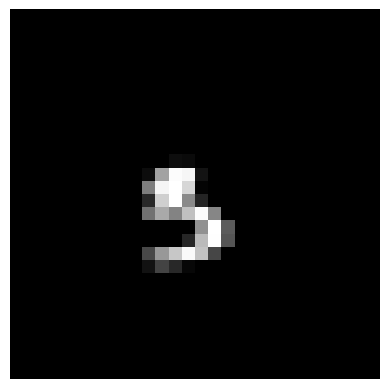

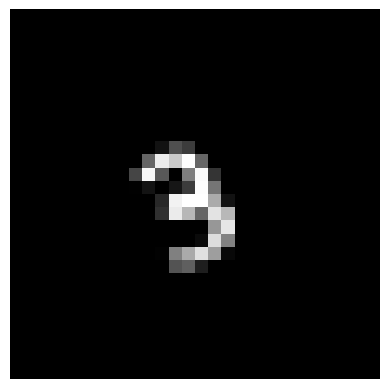

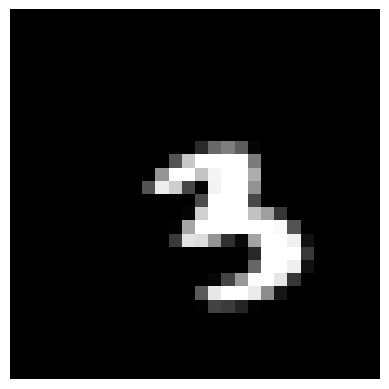

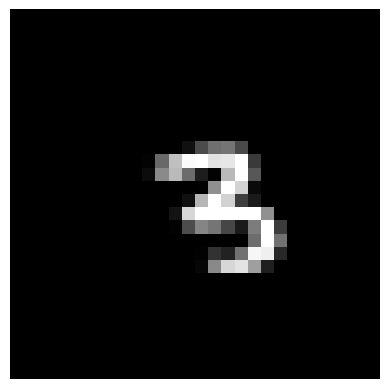

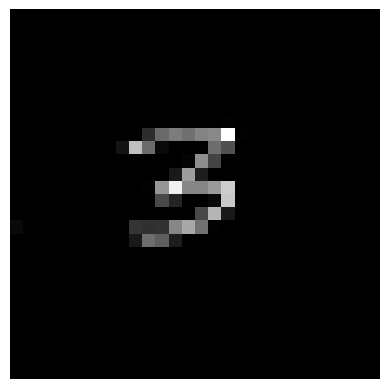

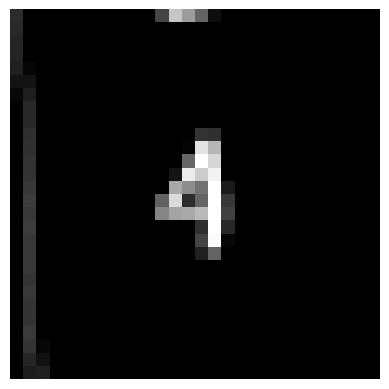

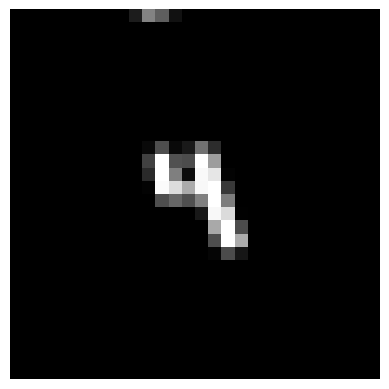

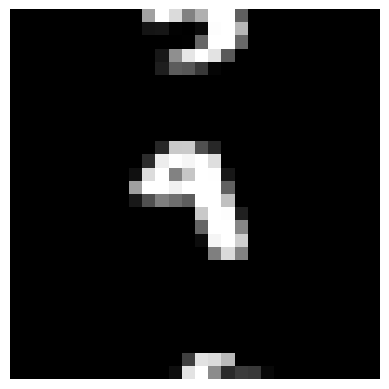

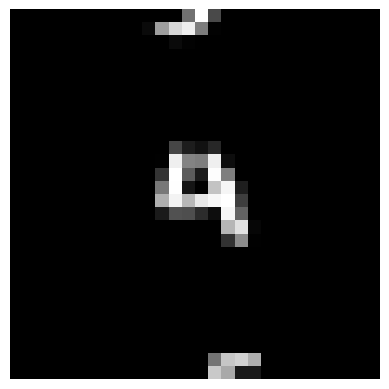

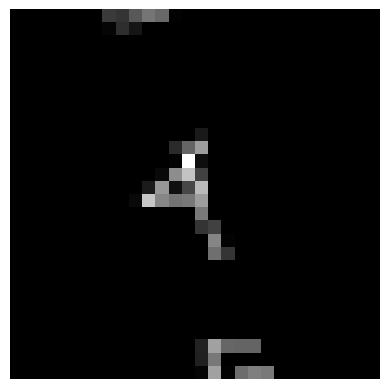

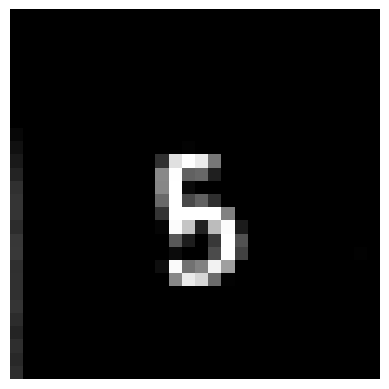

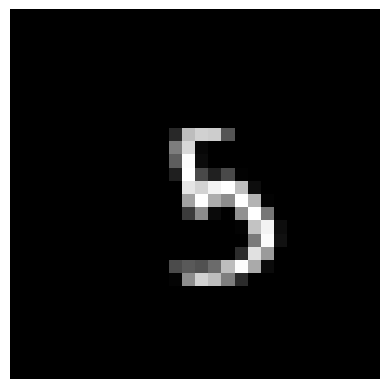

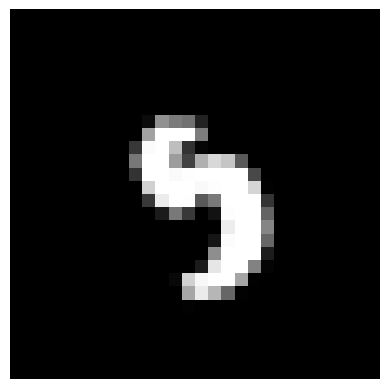

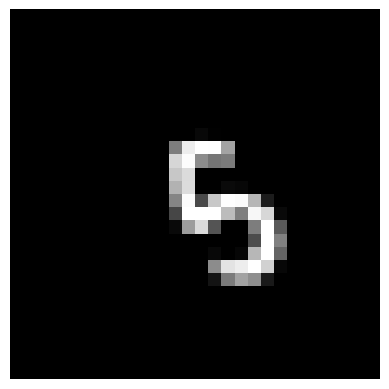

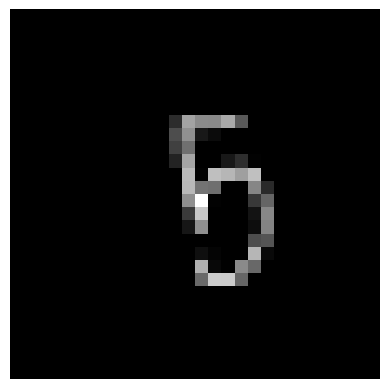

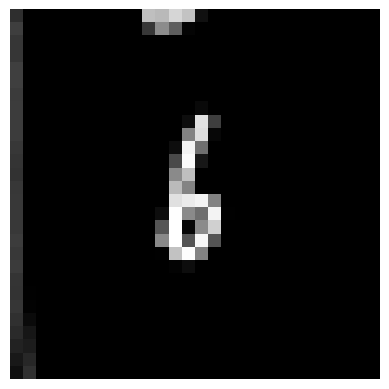

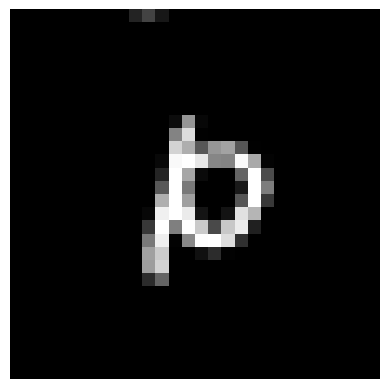

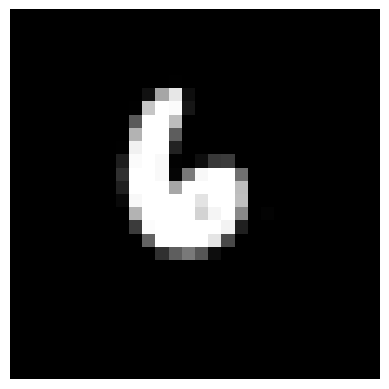

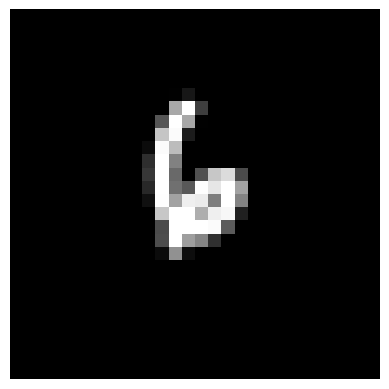

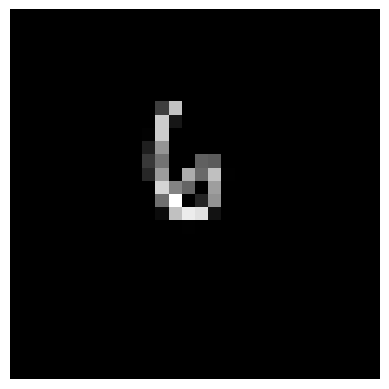

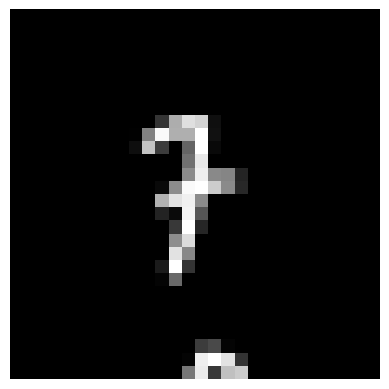

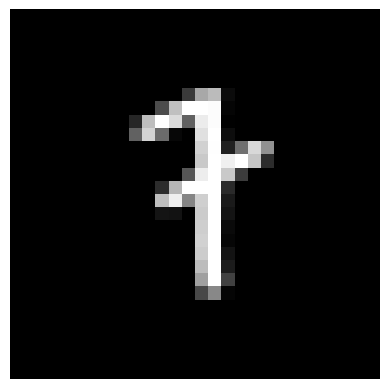

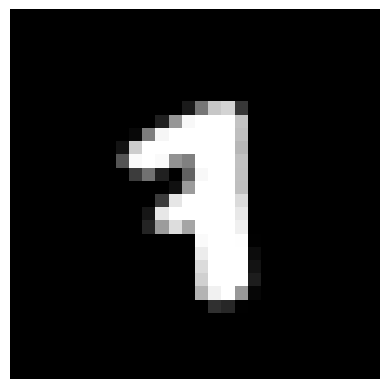

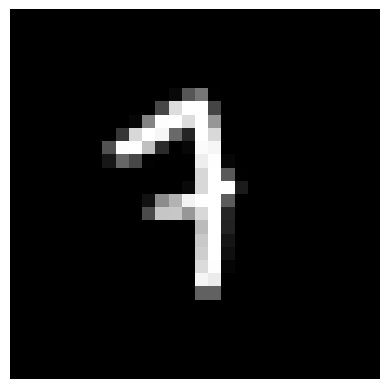

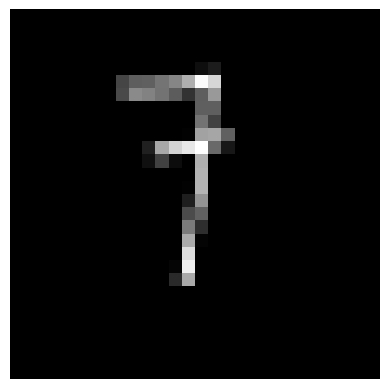

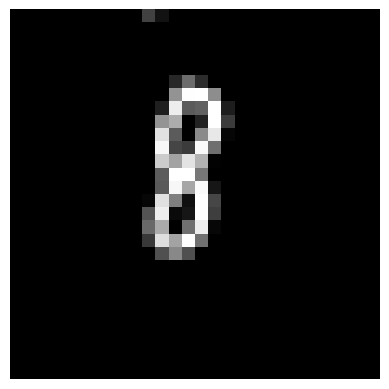

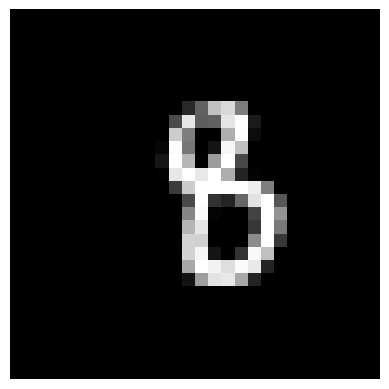

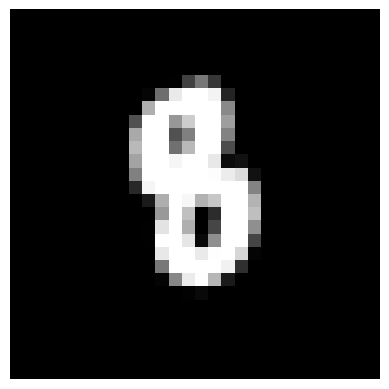

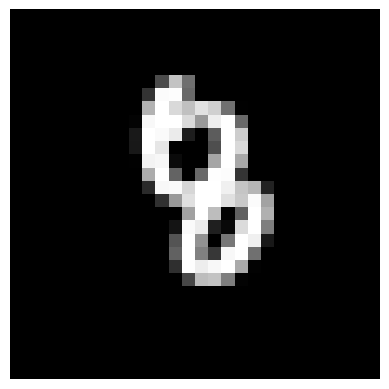

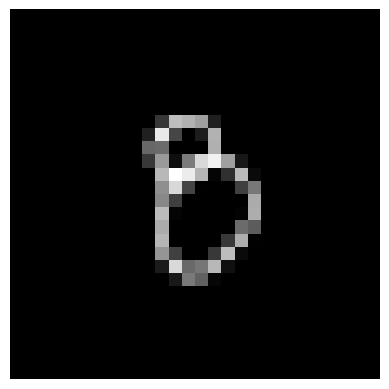

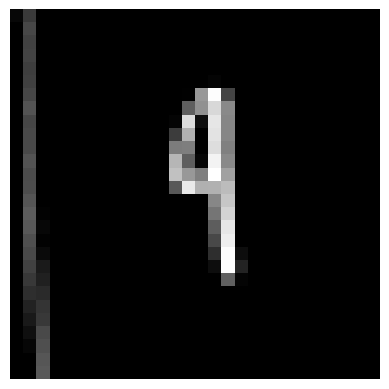

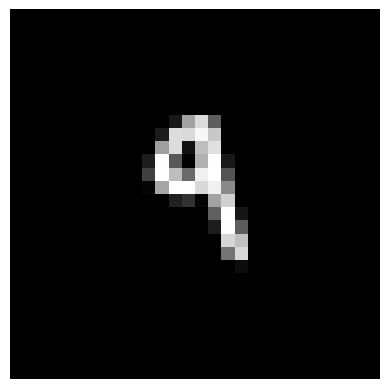

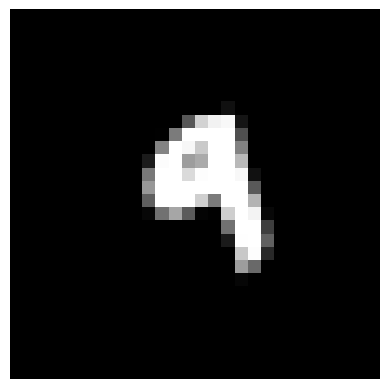

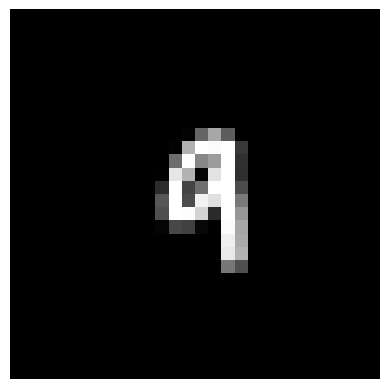

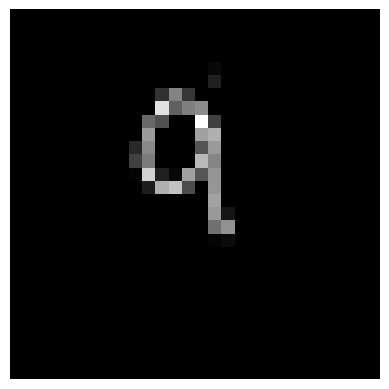

In [ ]:
i = 0
imagenes = []
imagenes_show = []
for i in range(1,51):
  img = img = cv2.imread(f'{i}.jpeg',cv2.IMREAD_GRAYSCALE)

  _, binary = cv2.threshold(img, 80, 255, cv2.THRESH_BINARY_INV)

  resized = cv2.resize(binary, (28, 28), interpolation=cv2.INTER_AREA)

  input_image = resized.reshape(1,28,28,1)

  imagenes_show.append(resized)
  imagenes.append(input_image)

for j in range(0,50):
  plt.imshow(imagenes_show[j], cmap='gray')
  plt.axis('off')
  plt.show()

Primero se genera un vector de labels para después poder evaluar correctamente los resultados del modelo usando las nuevas imagenes.

In [ ]:
labels = []
for i in range(0,10):
  for j in range (0, 5):
    labels.append(i)

Con esto listo, se genera un loop para leer las imagenes una por una y se cuentan los aciertos comparando con el vector de labels. A partir de esta cuenta se obtiene la exactitud del modelo con estas nuevas imagenes.

In [ ]:
model = keras.models.load_model('my_model.h5')
i = 0
correct = 0
for imagen in imagenes:
  prediction = model.predict(imagen)
  predicted_label = np.argmax(prediction)
  print(f"predicción:{predicted_label}  label:{labels[i]}")
  if predicted_label == labels[i]:
    correct =  correct + 1
  i = i + 1
accuracy = correct / 50
print(f"La exactitud del modelo con las imagenes nuevas es: {accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
predicción:4  label:0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
predicción:4  label:0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
predicción:9  label:0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
predicción:3  label:0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
predicción:9  label:0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
predicción:5  label:1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
predicción:1  label:1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
predicción:1  label:1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
predicción:1  label:1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
predicción:1  label:1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
predicción:9  label:2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
predicción:1  label:2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
predicción:1  label:2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
predicción:1  label:2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
predicción:9  label:2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
predicción:4  label:3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
p

Comparado con el modelo en los resultados previos, la exactitud es mucho peor: 0.97 contra 0.22. Algunos potenciales motivos de este error son las diferencias entre MNIST y las nuevas imagenes nuevas ya que la colocación de los números puede ser diferente, al igual que la iluminación o el grosor de los trazos. Debido a que el modelo actual se basa en redes neuronales NO convolucionales, se buscan ciertas formas en ciertos lugares, por lo cual un pequeño movimiento en la imagen puede generar una predicción totalmente diferente.

Con el objetivo de mejorar el desempeño de las predicciones se hicieron 3 cambios en el procesamiento de imagenes. Se agrego un Gaussian Blur con la función de cv2. Se creo una función nueva llamada recortar_y_centrar la cual busca los contornos más detallados y centra las figuras en la imagen previo a hacer el recorte 28x28. Por último se normalizan los valores de 0 a 255 -> 0 a 1 dividiendo la imagen final entre 255.

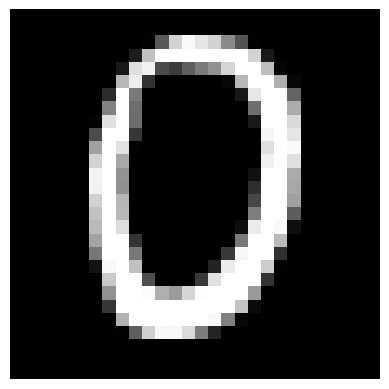

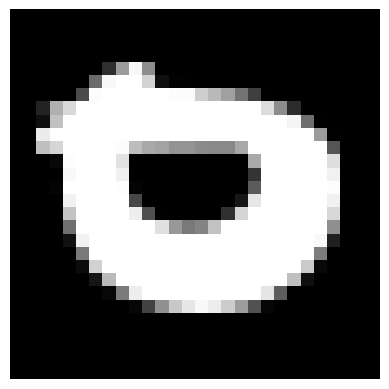

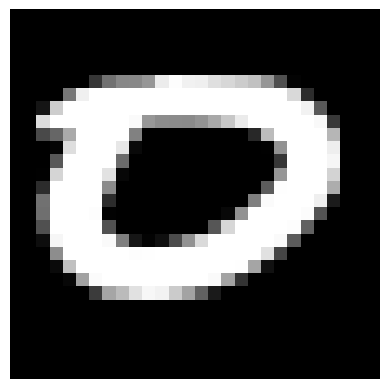

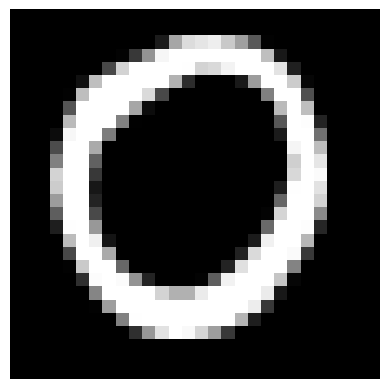

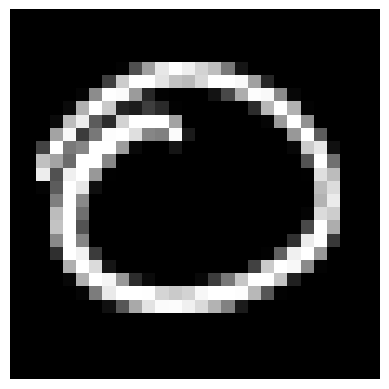

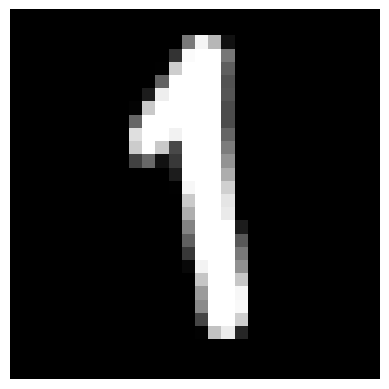

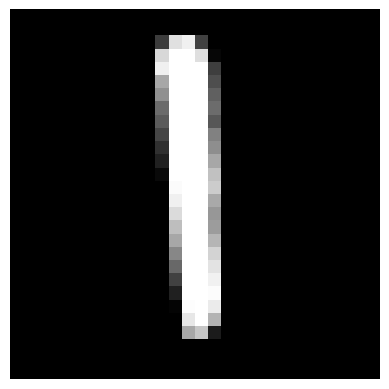

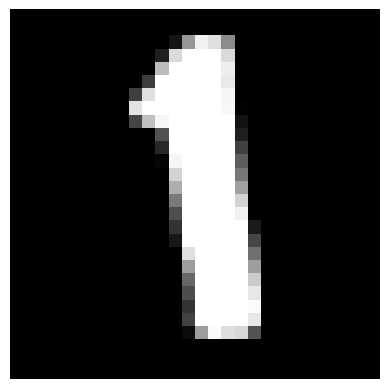

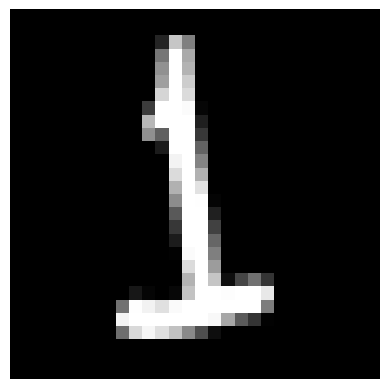

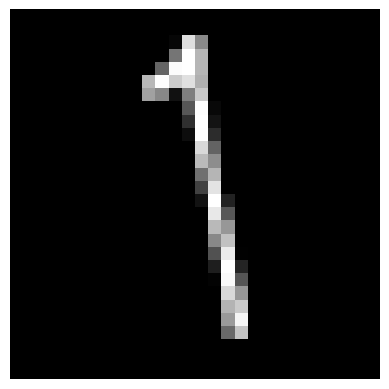

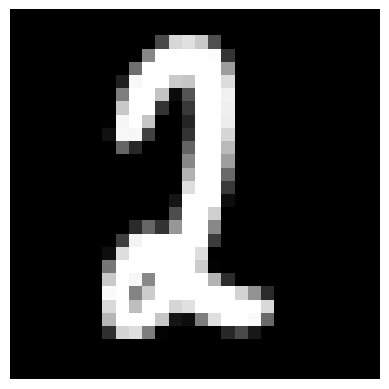

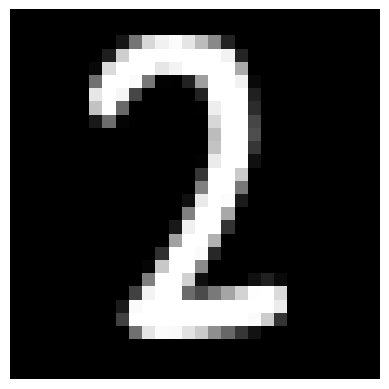

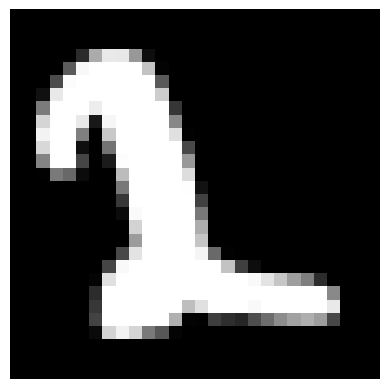

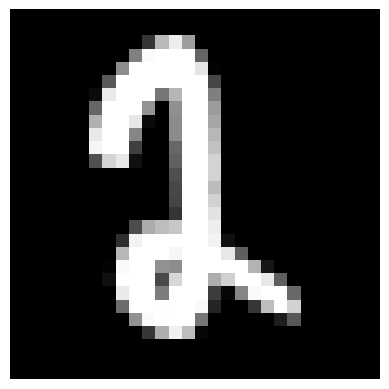

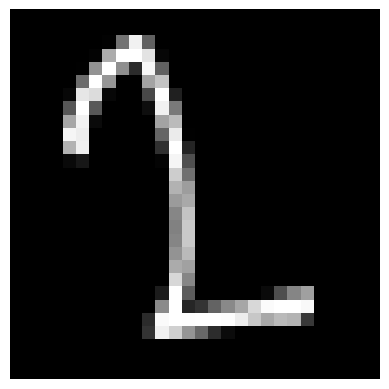

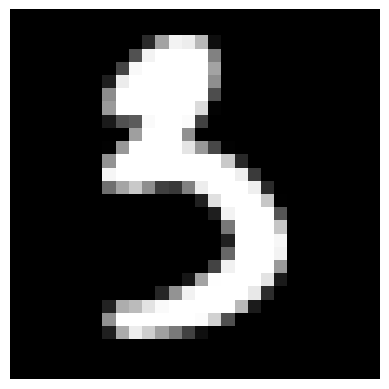

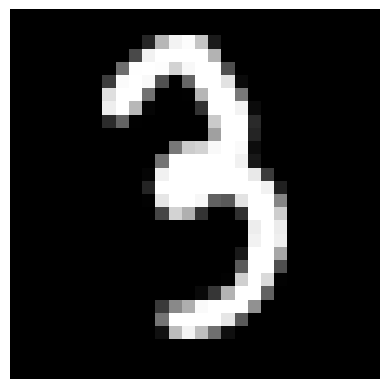

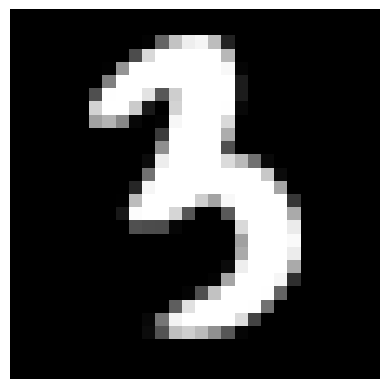

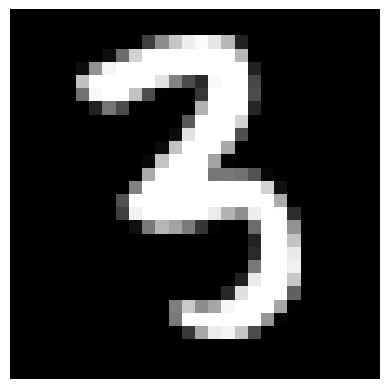

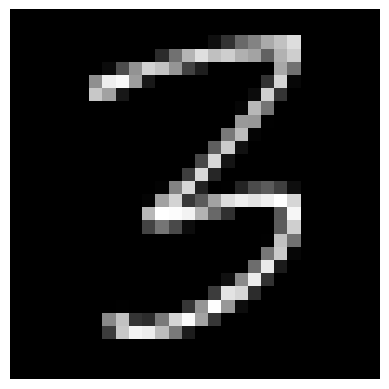

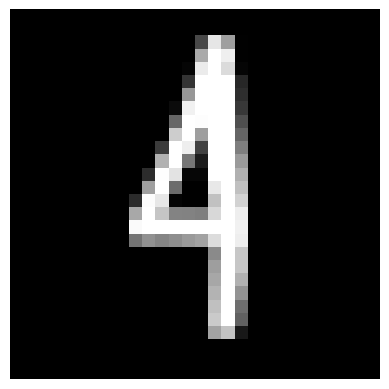

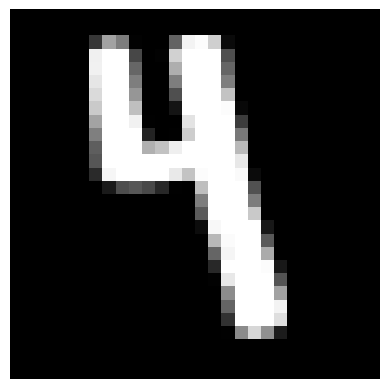

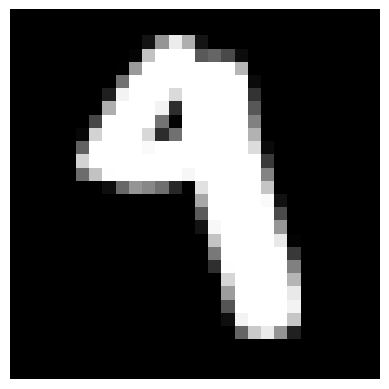

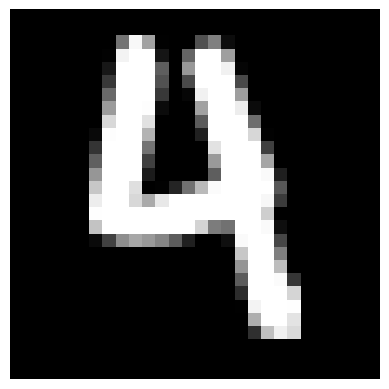

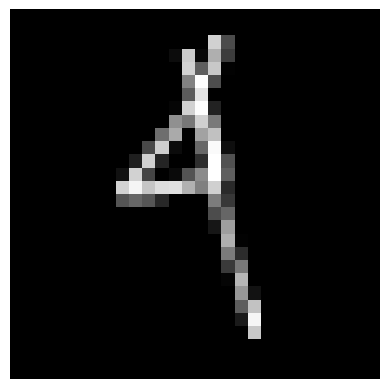

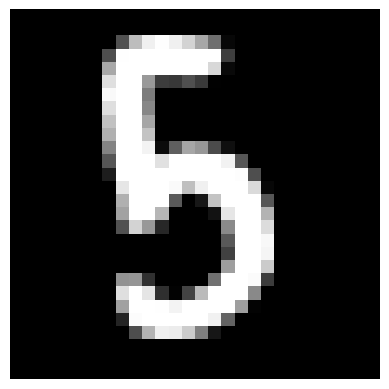

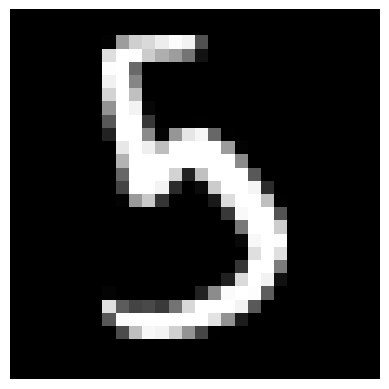

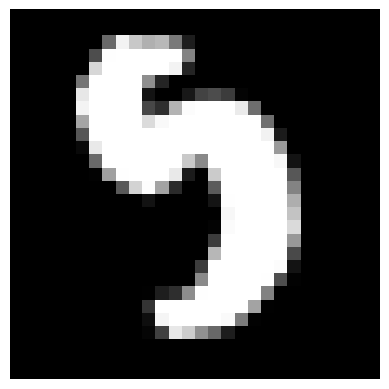

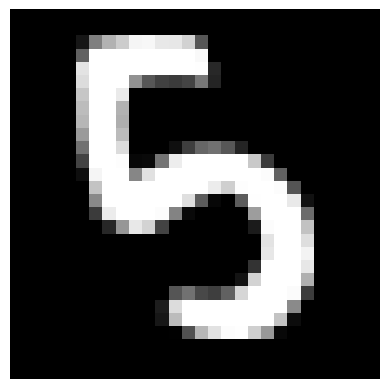

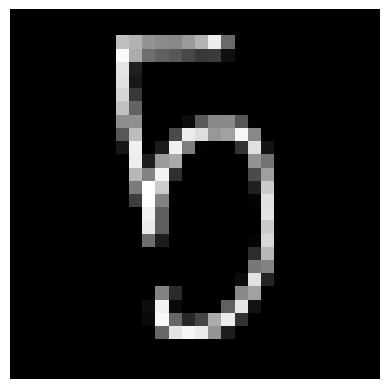

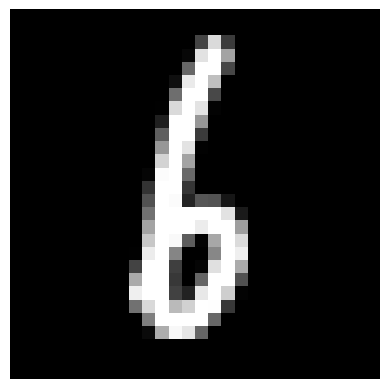

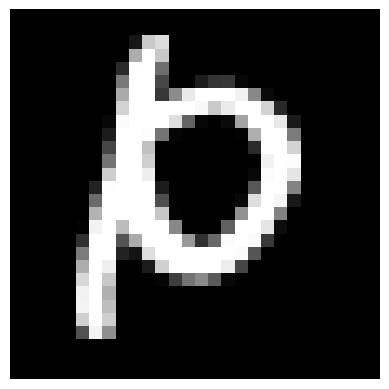

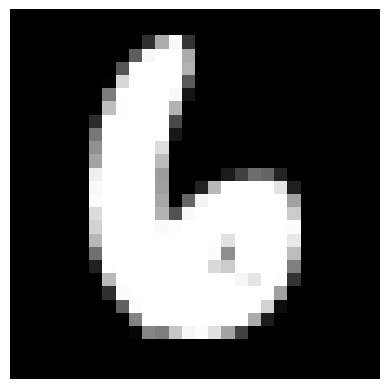

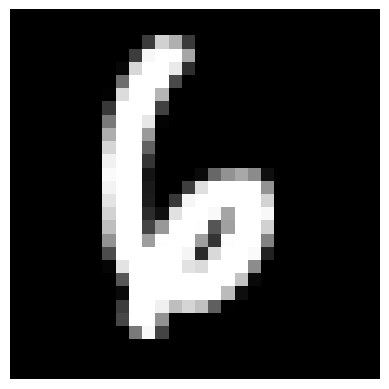

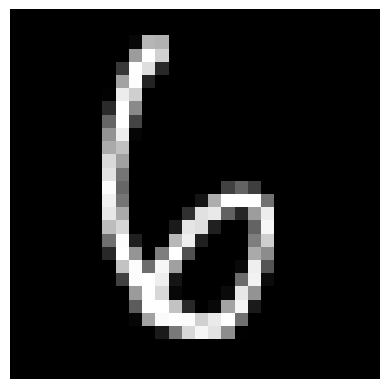

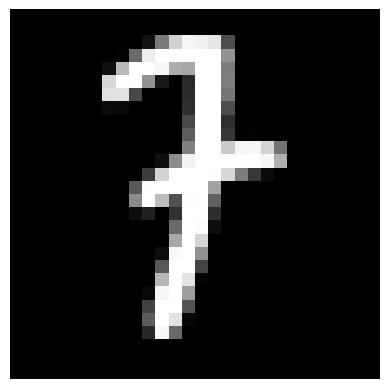

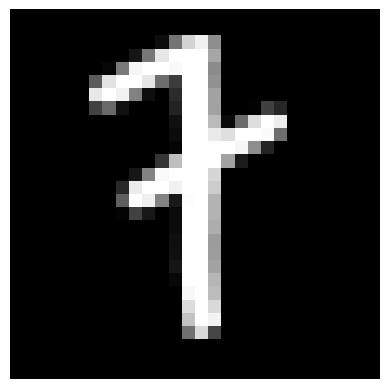

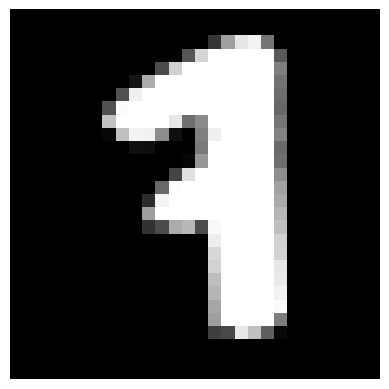

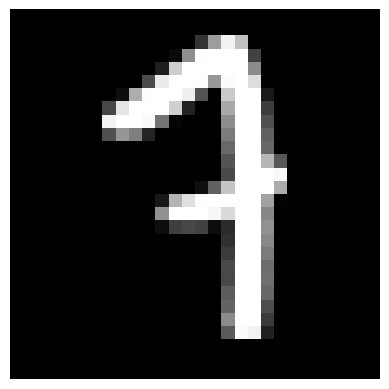

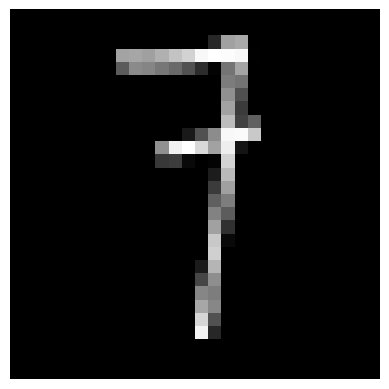

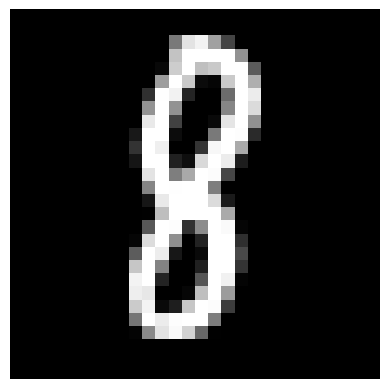

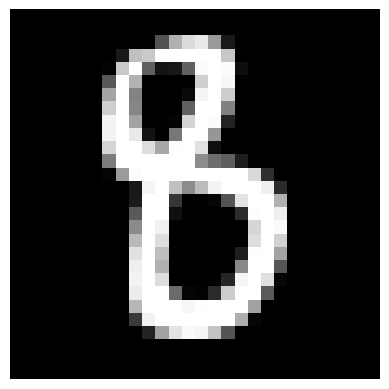

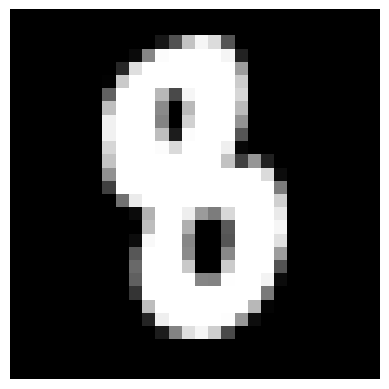

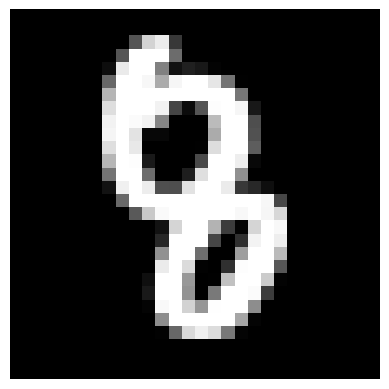

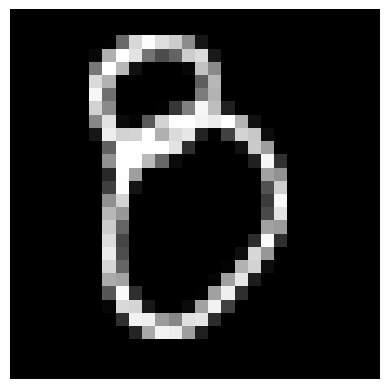

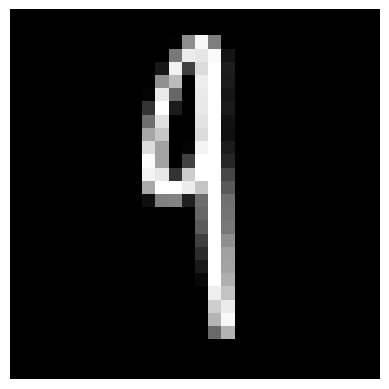

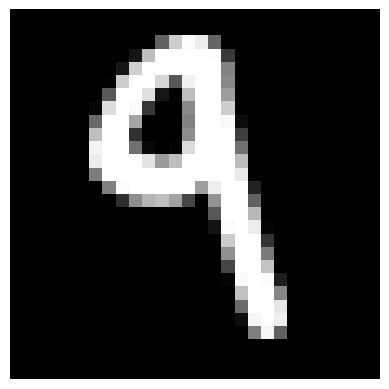

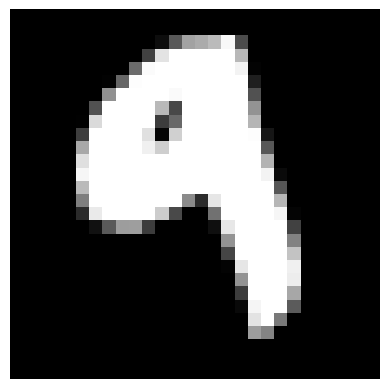

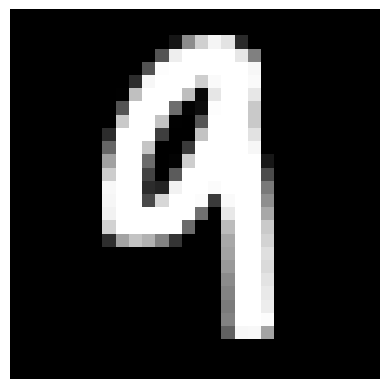

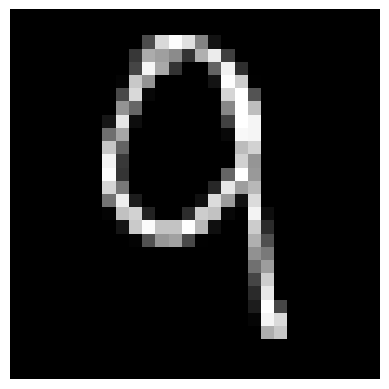

In [ ]:
i = 0
imagenes_mejoras = []
imagenes_mejoras_show = []

def recortar_y_centrar(img_binaria, tamaño_final=28, tamaño_objeto=23):
    contornos, _ = cv2.findContours(img_binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not contornos:

        return np.zeros((tamaño_final, tamaño_final), dtype=np.uint8)


    c = max(contornos, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(c)


    recorte = img_binaria[y:y+h, x:x+w]


    if w > h:
        new_w = tamaño_objeto
        new_h = int(h * tamaño_objeto / w)
    else:
        new_h = tamaño_objeto
        new_w = int(w * tamaño_objeto / h)


    recorte = cv2.resize(recorte, (new_w, new_h), interpolation=cv2.INTER_AREA)


    fondo = np.zeros((tamaño_final, tamaño_final), dtype=np.uint8)


    x_offset = (tamaño_final - new_w) // 2
    y_offset = (tamaño_final - new_h) // 2

    fondo[y_offset:y_offset+new_h, x_offset:x_offset+new_w] = recorte

    return fondo

for i in range(1,51):
  img = img = cv2.imread(f'{i}.jpeg',cv2.IMREAD_GRAYSCALE)

  img = cv2.GaussianBlur(img,(1, 1),0)

  _, binary = cv2.threshold(img, 80, 255, cv2.THRESH_BINARY_INV)


  resized = recortar_y_centrar(binary)

  resized = resized / 255.0
  input_image = resized.reshape(1,28,28,1)

  imagenes_mejoras_show.append(resized)
  imagenes_mejoras.append(input_image)

for j in range(0,50):
  plt.imshow(imagenes_mejoras_show[j], cmap='gray')
  plt.axis('off')
  plt.show()

In [ ]:
i = 0
correct = 0
for imagen in imagenes_mejoras:
  prediction = model.predict(imagen)
  predicted_label = np.argmax(prediction)
  print(f"predicción:{predicted_label}  label:{labels[i]}")
  if predicted_label == labels[i]:
    correct =  correct + 1
  i = i + 1
accuracy = correct / 50
print(f"La exactitud del modelo con las imagenes nuevas es: {accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
predicción:8  label:0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
predicción:8  label:0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
predicción:8  label:0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
predicción:8  label:0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
predicción:8  label:0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
predicción:8  label:1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
predicción:8  label:1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
predicción:8  label:1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
predicción:8  label:1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
predicción:8  label:1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
predicción:8  label:2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
predicción:8  label:2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
predicción:8  label:2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
predicción:8  label:2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
predicción:8  label:2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
predicción:8  label:3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
pr

A pesar de los esfuerzos, no hubo mejora en la predicción del sistema. A juzgar por las predicciones, las cuales son todas 8, el sistema identifica figuras centradas y alta concentración de pixeles en el centro como un 8 y de ahí que solo prediga bien 1/5 de las imagenes.

Considerando los cambios, a continuación se escribe una función que permite correr un sistema de predicción en tiempo real en cualquier dispositivo o máquina que corra python.

In [ ]:
%%writefile real_time_prediction.py
import cv2
import numpy as np
import tensorflow as tf

# Definir función de recorte y centrado
def recortar_y_centrar(img_binaria, tamaño_final=28, tamaño_objeto=23):
    contornos, _ = cv2.findContours(img_binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not contornos:
        return np.zeros((tamaño_final, tamaño_final), dtype=np.uint8)

    c = max(contornos, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(c)

    recorte = img_binaria[y:y+h, x:x+w]

    if w > h:
        new_w = tamaño_objeto
        new_h = int(h * tamaño_objeto / w)
    else:
        new_h = tamaño_objeto
        new_w = int(w * tamaño_objeto / h)

    recorte = cv2.resize(recorte, (new_w, new_h), interpolation=cv2.INTER_AREA)

    fondo = np.zeros((tamaño_final, tamaño_final), dtype=np.uint8)
    x_offset = (tamaño_final - new_w) // 2
    y_offset = (tamaño_final - new_h) // 2
    fondo[y_offset:y_offset+new_h, x_offset:x_offset+new_w] = recorte

    return fondo

# Cargar modelo
model = tf.keras.models.load_model("my_model.h5")

# Iniciar cámara
cap = cv2.VideoCapture(0)

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Procesamiento
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        gray = cv2.GaussianBlur(gray, (1, 1), 0)

        _, binary = cv2.threshold(gray, 80, 255, cv2.THRESH_BINARY_INV)

        resized = recortar_y_centrar(binary)

        resized = resized / 255.0  # Normalizar
        input_img = resized.reshape(1, 28, 28, 1)

        # Predicción
        prediction = model.predict(input_img)
        predicted_label = np.argmax(prediction)

        # Mostrar resultado
        frame_with_prediction = cv2.putText(
            frame,
            str(predicted_label),
            (10, 30),
            cv2.FONT_HERSHEY_SIMPLEX,
            1,
            (255, 0, 0),
            2,
            cv2.LINE_AA
        )

        cv2.imshow('Real-time prediction', frame_with_prediction)

        # Mostrar imagen procesada escalada
        upscaled_resized = cv2.resize(resized, (280, 280), interpolation=cv2.INTER_NEAREST)
        cv2.imshow('Resized Image', upscaled_resized)

        # Presionar 'q' para salir
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

except KeyboardInterrupt:
    pass

finally:
    cap.release()
    cv2.destroyAllWindows()


Writing real_time_prediction.py


Debido a la detección constante de 8's por el sistema "mejorado", se utilizará la primera versión del sistema para la función en tiempo real, ya que por lo menos varía en sus predicciones.

In [2]:
%%writefile real_time_prediction.py
import cv2
import numpy as np
import tensorflow as tf

# Cargar el modelo
model = tf.keras.models.load_model("my_model.h5")

# Función de preprocesamiento de imagen
def preprocesar_imagen(frame):
    """
    Función para preprocesar un frame de video, binarizarlo, redimensionarlo a 28x28
    y darle el formato adecuado para el modelo.

    :param frame: Imagen capturada desde la cámara (en formato BGR).
    :return: La imagen procesada lista para ser usada en el modelo (reshape: 1, 28, 28, 1)
    """
    # Convertir el frame a escala de grises
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Binarizar la imagen (threshold inverso)
    _, binary = cv2.threshold(gray, 80, 255, cv2.THRESH_BINARY_INV)

    # Redimensionar la imagen a 28x28 píxeles
    resized = cv2.resize(binary, (28, 28), interpolation=cv2.INTER_AREA)

    # Hacer reshape para que la imagen sea (1, 28, 28, 1)
    input_image = resized.reshape(1, 28, 28, 1)

    return input_image

# Iniciar la cámara
cap = cv2.VideoCapture(0)

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Procesar la imagen en tiempo real
        resized = preprocesar_imagen(frame)

        # Predicción
        prediction = model.predict(resized)
        predicted_label = np.argmax(prediction)

        # Mostrar el resultado en la cámara en tiempo real
        frame_with_prediction = cv2.putText(
            frame,
            str(predicted_label),
            (10, 30),
            cv2.FONT_HERSHEY_SIMPLEX,
            1,
            (255, 0, 0),
            2,
            cv2.LINE_AA
        )

        cv2.imshow('Real-time prediction', frame_with_prediction)

        # Mostrar imagen redimensionada en otra ventana
        upscaled_resized = cv2.resize(resized[0], (280, 280), interpolation=cv2.INTER_NEAREST)
        cv2.imshow('Resized Image', upscaled_resized)

        # Presionar 'q' para salir
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

except KeyboardInterrupt:
    pass

finally:
    cap.release()
    cv2.destroyAllWindows()


Overwriting real_time_prediction.py
